In [1]:
from dateutil.parser import parse

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5


In [3]:
pd.to_datetime('2018-5-15 3:45pm')

Timestamp('2018-05-15 15:45:00')

In [4]:
pd.to_datetime('7/8/2018')

Timestamp('2018-07-08 00:00:00')

In [5]:
pd.to_datetime('7/8/1952',dayfirst = True)

Timestamp('1952-08-07 00:00:00')

In [6]:
pd.to_datetime(['2018-01-05','7/8/1952','Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime(['2/25/10','8/6/17','12/15/12'],format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [8]:
opsd_daily = pd.read_csv('datasets/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [9]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [10]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [12]:
format = '%Y-%m-%d'

opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'],format=format)

opsd_daily.set_index('Date',inplace=True)
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [13]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [16]:
pd.DatetimeIndex(opsd_daily.index).year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [15]:
pd.DatetimeIndex(opsd_daily.index).week

Int64Index([52,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            51, 51, 51, 52, 52, 52, 52, 52, 52, 52],
           dtype='int64', name='Date', length=4383)

In [27]:
opsd_daily['Year'] = pd.DatetimeIndex(opsd_daily.index).year
opsd_daily['Month'] = pd.DatetimeIndex(opsd_daily.index).month
#opsd_daily['WeekdayName'] = pd.DatetimeIndex(opsd_daily.index).weekday_name

opsd_daily.sample(5, random_state =0)

AttributeError: type object 'DatetimeIndex' has no attribute 'weekday_name'

In [28]:
opsd_daily['WeekdayName'] = (opsd_daily.index).weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [24]:
opsd_daily.loc['2017-08-10']

Consumption                                              1351.49
Wind                                                     100.274
Solar                                                      71.16
Wind+Solar                                               171.434
Year                                                        2017
Month                                                          8
WeekdayName    <bound method PandasDelegate._add_delegate_acc...
Name: 2017-08-10 00:00:00, dtype: object

In [25]:
opsd_daily.loc['2014-01-20':'2014-01-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,WeekdayName
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,<bound method PandasDelegate._add_delegate_acc...
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,<bound method PandasDelegate._add_delegate_acc...
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,<bound method PandasDelegate._add_delegate_acc...
2014-01-23,1631.373,125.177,13.661,138.838,2014,1,<bound method PandasDelegate._add_delegate_acc...
2014-01-24,1617.411,106.527,9.807,116.334,2014,1,<bound method PandasDelegate._add_delegate_acc...
2014-01-25,1399.124,145.786,19.051,164.837,2014,1,<bound method PandasDelegate._add_delegate_acc...


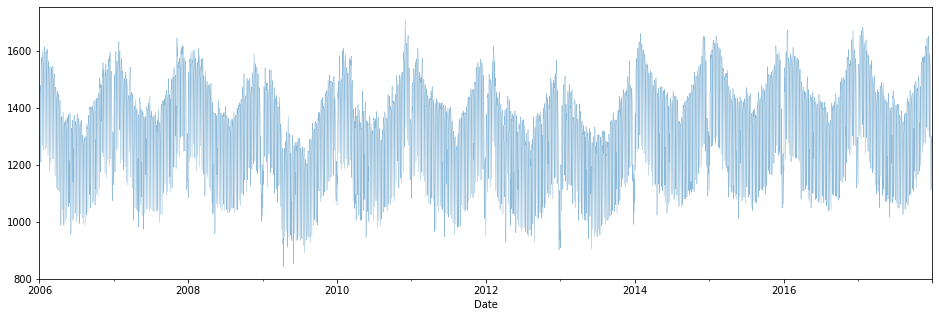

In [29]:
#Visualizing time Series Data
plt.figure(figsize=(16, 5))
opsd_daily['Consumption'].plot(linewidth=0.5,alpha=.5);

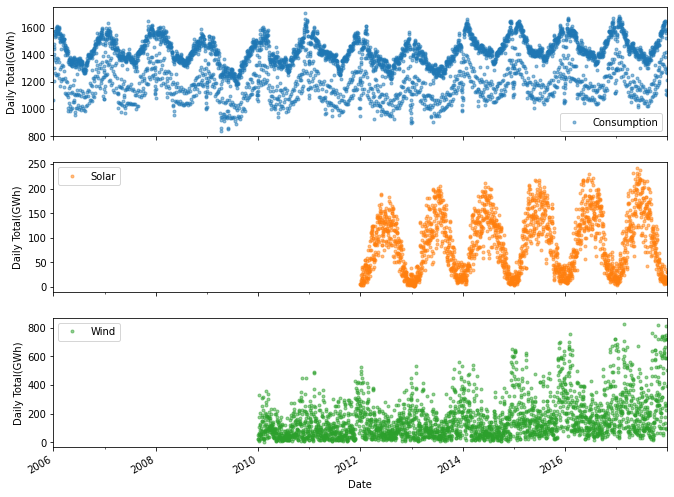

In [31]:
cols_plot = ['Consumption','Solar','Wind']

axes = opsd_daily[cols_plot].plot(marker ='.',
                                 alpha=0.5,
                                 linestyle = 'None',
                                 figsize=(11, 9),
                                 subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Total(GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

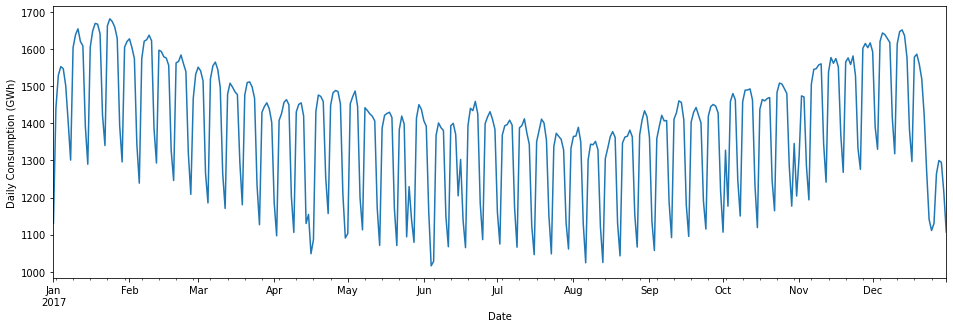

In [35]:
plt.figure(figsize=(16, 5))
ax = opsd_daily.loc['2017' :, 'Consumption'].plot()
ax.set_ylabel("Daily Consumption (GWh)")

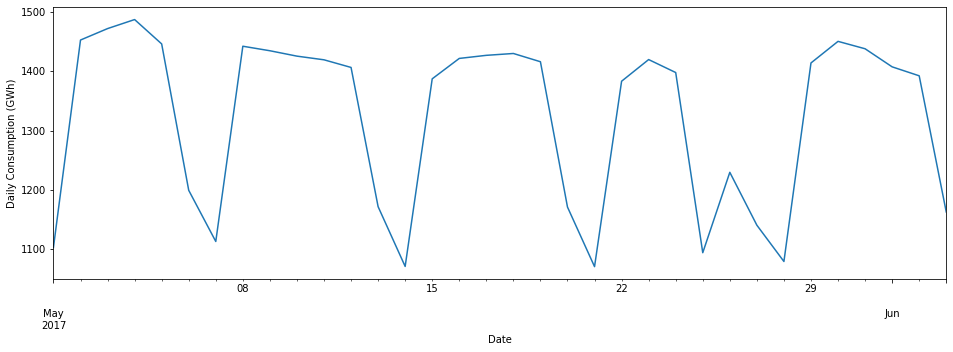

In [37]:
plt.figure(figsize=(16, 5))
ax = opsd_daily.loc['2017-05-01':'2017-06-03','Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Text(0, 0.5, 'Daily Consumption(GWh)')

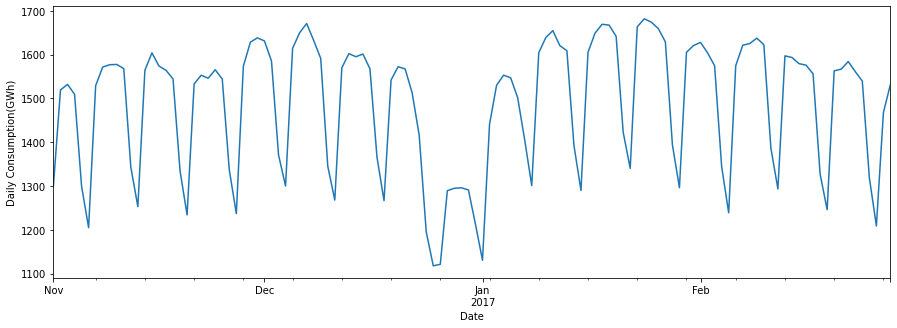

In [39]:
ax = opsd_daily.loc['2016-11-01':'2017-02-28','Consumption'].plot()
ax.set_ylabel('Daily Consumption(GWh)')